In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing the dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download file from Kaggle
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:05<00:00, 169MB/s]
100% 812M/812M [00:05<00:00, 164MB/s]


In [ ]:
# unzip the downloaded files
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("File 1 Extracted!")
  
dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("File 2 Extracted!")

File 1 Extracted!
File 2 Extracted!


In [ ]:
import os
# counting no. of images in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


In [ ]:
original_folder ='/content/train/'
resized_folder ='/content/image_resized/'

# creating directory for resized images
os.mkdir(resized_folder)

In [ ]:
# copying first 2000 photos 
# resizing it to 224 X 224 and  converting it to RGB

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

In [ ]:
file_names = os.listdir(resized_folder)
print(file_names)

['cat.12122.jpg', 'dog.283.jpg', 'cat.8354.jpg', 'dog.12490.jpg', 'cat.2773.jpg', 'cat.961.jpg', 'cat.221.jpg', 'cat.7926.jpg', 'cat.1099.jpg', 'cat.8215.jpg', 'dog.5784.jpg', 'cat.1869.jpg', 'dog.3601.jpg', 'dog.9026.jpg', 'cat.4315.jpg', 'cat.9757.jpg', 'cat.3077.jpg', 'dog.8687.jpg', 'cat.1247.jpg', 'dog.10474.jpg', 'dog.2980.jpg', 'dog.3608.jpg', 'dog.1399.jpg', 'dog.11463.jpg', 'dog.6417.jpg', 'dog.474.jpg', 'dog.10353.jpg', 'dog.11324.jpg', 'dog.5185.jpg', 'cat.1043.jpg', 'cat.133.jpg', 'dog.5167.jpg', 'cat.6116.jpg', 'cat.8544.jpg', 'cat.10651.jpg', 'dog.2411.jpg', 'dog.5305.jpg', 'dog.158.jpg', 'dog.7996.jpg', 'cat.8837.jpg', 'cat.10645.jpg', 'cat.6995.jpg', 'dog.3198.jpg', 'dog.8223.jpg', 'dog.4108.jpg', 'dog.12055.jpg', 'cat.6267.jpg', 'dog.11207.jpg', 'dog.4118.jpg', 'dog.4201.jpg', 'dog.11897.jpg', 'cat.6302.jpg', 'dog.4078.jpg', 'dog.8793.jpg', 'dog.4623.jpg', 'dog.5061.jpg', 'dog.11300.jpg', 'dog.5059.jpg', 'cat.9920.jpg', 'cat.2899.jpg', 'dog.8344.jpg', 'dog.7486.jpg', '

In [ ]:
# creating lables for resized images --> cat -> 0 | dog -> 1
filenames = os.listdir(resized_folder)

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]   # first 3 letter of filename tells if it's cat or dog

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames)
print(labels)
print(len(filenames))

['cat.12122.jpg', 'dog.283.jpg', 'cat.8354.jpg', 'dog.12490.jpg', 'cat.2773.jpg', 'cat.961.jpg', 'cat.221.jpg', 'cat.7926.jpg', 'cat.1099.jpg', 'cat.8215.jpg', 'dog.5784.jpg', 'cat.1869.jpg', 'dog.3601.jpg', 'dog.9026.jpg', 'cat.4315.jpg', 'cat.9757.jpg', 'cat.3077.jpg', 'dog.8687.jpg', 'cat.1247.jpg', 'dog.10474.jpg', 'dog.2980.jpg', 'dog.3608.jpg', 'dog.1399.jpg', 'dog.11463.jpg', 'dog.6417.jpg', 'dog.474.jpg', 'dog.10353.jpg', 'dog.11324.jpg', 'dog.5185.jpg', 'cat.1043.jpg', 'cat.133.jpg', 'dog.5167.jpg', 'cat.6116.jpg', 'cat.8544.jpg', 'cat.10651.jpg', 'dog.2411.jpg', 'dog.5305.jpg', 'dog.158.jpg', 'dog.7996.jpg', 'cat.8837.jpg', 'cat.10645.jpg', 'cat.6995.jpg', 'dog.3198.jpg', 'dog.8223.jpg', 'dog.4108.jpg', 'dog.12055.jpg', 'cat.6267.jpg', 'dog.11207.jpg', 'dog.4118.jpg', 'dog.4201.jpg', 'dog.11897.jpg', 'cat.6302.jpg', 'dog.4078.jpg', 'dog.8793.jpg', 'dog.4623.jpg', 'dog.5061.jpg', 'dog.11300.jpg', 'dog.5059.jpg', 'cat.9920.jpg', 'cat.2899.jpg', 'dog.8344.jpg', 'dog.7486.jpg', '

In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1010  990]


In [ ]:
# converting all the resized images to numpy arrays

import cv2
import glob

image_directory = resized_folder
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

#print(dog_cat_images[0:5,:,:,:])
print(dog_cat_images)
print(dog_cat_images.shape)

[[[[ 11  12  10]
   [ 10  11   9]
   [ 12  13  11]
   ...
   [ 30  31  29]
   [ 43  44  42]
   [ 44  45  43]]

  [[ 12  13  11]
   [ 12  13  11]
   [ 14  15  13]
   ...
   [ 30  31  29]
   [ 43  44  42]
   [ 44  45  43]]

  [[ 15  16  14]
   [ 15  16  14]
   [ 16  17  15]
   ...
   [ 30  31  29]
   [ 43  44  42]
   [ 44  45  43]]

  ...

  [[  4   5   3]
   [  0   1   0]
   [  1   2   0]
   ...
   [139 149 156]
   [135 145 152]
   [133 143 150]]

  [[  4   5   1]
   [  2   3   0]
   [  5   6   2]
   ...
   [140 148 155]
   [136 144 151]
   [133 141 148]]

  [[  0   1   0]
   [  1   2   0]
   [ 12  13   9]
   ...
   [133 141 148]
   [127 135 142]
   [124 132 139]]]


 [[[ 75 113 115]
   [ 71 109 111]
   [ 71 104 107]
   ...
   [ 85 115 120]
   [ 83 112 119]
   [ 72 101 108]]

  [[ 74 112 114]
   [ 74 109 112]
   [ 74 107 110]
   ...
   [ 89 119 124]
   [ 88 117 124]
   [ 81 110 117]]

  [[ 75 110 113]
   [ 76 111 114]
   [ 79 112 115]
   ...
   [ 89 119 124]
   [ 90 119 126]
   [ 89 118

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

X_train_scaled = X_train/255
X_test_scaled = X_test/255
print(X_train_scaled)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)
[[[[0.41176471 0.48627451 0.4745098 ]
   [0.43529412 0.50980392 0.49803922]
   [0.46666667 0.54117647 0.52941176]
   ...
   [0.6627451  0.65490196 0.65098039]
   [0.68627451 0.66666667 0.6627451 ]
   [0.69019608 0.67058824 0.66666667]]

  [[0.44705882 0.51372549 0.50196078]
   [0.45098039 0.5254902  0.51372549]
   [0.46666667 0.54117647 0.52941176]
   ...
   [0.65490196 0.64705882 0.64313725]
   [0.68627451 0.66666667 0.6627451 ]
   [0.69411765 0.6745098  0.67058824]]

  [[0.49019608 0.54509804 0.5372549 ]
   [0.47843137 0.54509804 0.53333333]
   [0.47843137 0.54509804 0.53333333]
   ...
   [0.63921569 0.63137255 0.62745098]
   [0.6745098  0.65490196 0.65098039]
   [0.69019608 0.67058824 0.66666667]]

  ...

  [[0.0627451  0.07058824 0.07058824]
   [0.05098039 0.05882353 0.05882353]
   [0.04705882 0.05490196 0.05490196]
   ...
   [0.13333333 0.15294118 0.16470588]
   [0.0627451  0.08627451 0.10588235]
   [0.05490196 0.09019608 

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 55s 1s/step - loss: 0.2196 - acc: 0.9019
Epoch 2/5
50/50 [==============================] - 51s 1s/step - loss: 0.0621 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 52s 1s/step - loss: 0.0391 - acc: 0.9912
Epoch 4/5
50/50 [==============================] - 50s 1s/step - loss: 0.0309 - acc: 0.9950
Epoch 5/5
50/50 [==============================] - 51s 1s/step - loss: 0.0236 - acc: 0.9956


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 14s 982ms/step - loss: 0.0680 - acc: 0.9750
Test Loss = 0.06800693273544312
Test Accuracy = 0.9750000238418579


Path of the image to be predicted: Pic1.png


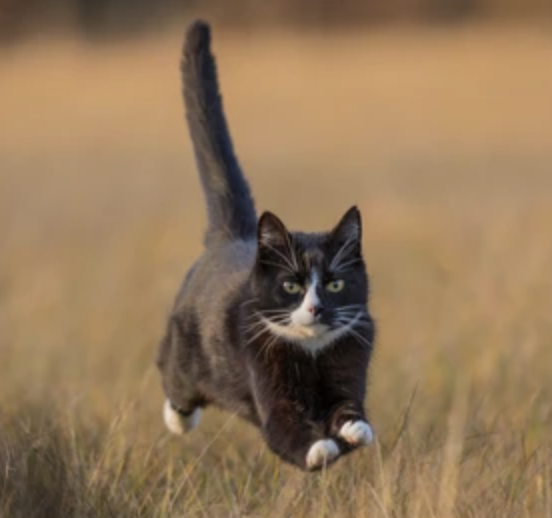

1/1 [==============================] - 1s 660ms/step
[[ 2.6459575 -3.1115894]]
0
The image represents a Cat


In [ ]:
# predict the animal
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: Pic2.png


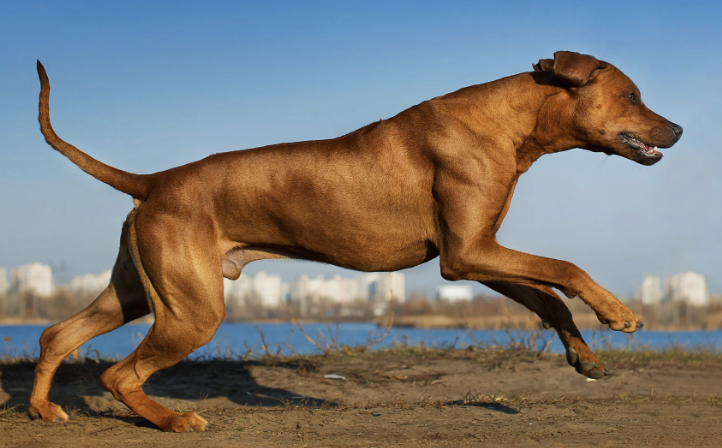

1/1 [==============================] - 0s 109ms/step
[[-4.13654    4.0565076]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')